# Edge Detection by hand - implemented from scratch using python

we have implemented edge detection from scratch using python

Steps:

- Smooth the image with 2D gaussian: $n_{\sigma} * I$
- Compute Image Gradient using Sobel Operator: $\nabla n_{\sigma} * I$
- Find Gradient Magnitude at each pixel: $|| \nabla n_{\sigma} * I ||$
- Find Gradient Orientation at each pixel:
$$ \hat{n} = \frac{\nabla n_{\sigma} * I}{|| \nabla n_{\sigma} * I ||}$$
- Compute the laplacian along the Gradient Direction $\hat{n}$ at each pixel

$$ \frac{\partial^2(n_{\sigma} * I)}{\partial\hat{n}^2}$$

## Import the necessary packages we only numpy for vector operations, matplotlib for plotting and math for mathematical operations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Taken the patch from image frames using Image Viewer in MatLab

In [2]:
image_patch = [[43,46,97,170,192],[42,47,99,171,192],[43,46,100,172,190],[43,45,100,175,192],[43,46,101,176,192]]

In [3]:
image_patch = np.array(image_patch)

In [4]:
image_patch.shape

(5, 5)

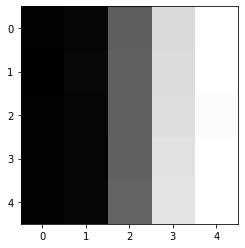

In [5]:
plt.imshow(image_patch, cmap='gray')

# The next block contains functions necessary for the implementation of edge detection

#### High Level Overview 
- convolution - for convolution operation
- dnorm - the function will give the values of the gaussian function to populate the guassian kernel
- guassian kernel function - will create the guassian kernel
- guassian blur - with the guassian kernel as input it will blur the output

In [6]:
def convolution(image, kernel, average=False, verbose=False):
    if len(image.shape) == 3:
        print("Found 3 Channels : {}".format(image.shape))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print("Converted to Gray Channel. Size : {}".format(image.shape))
    else:
        print("Image Shape : {}".format(image.shape))
 
    print("Kernel Shape : {}".format(kernel.shape))
 
    if verbose:
        plt.imshow(image, cmap='gray')
        plt.title("Image")
        plt.show()
 
    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape
 
    output = np.zeros(image.shape)
 
    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)
 
    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
 
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image
 
    if verbose:
        plt.imshow(padded_image, cmap='gray')
        plt.title("Padded Image")
        plt.show()
 
    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]
 
    print("Output Image size : {}".format(output.shape))
 
    if verbose:
        plt.imshow(output, cmap='gray')
        plt.title("Output Image using {}X{} Kernel".format(kernel_row, kernel_col))
        plt.show()
 
    return output

In [7]:
def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)
 
def gaussian_kernel(size, sigma=1, verbose=False):
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)
 
    kernel_2D *= 1.0 / kernel_2D.max()
 
    if verbose:
        plt.imshow(kernel_2D, interpolation='none', cmap='gray')
        plt.title("Kernel ( {}X{} )".format(size, size))
        plt.show()
 
    return kernel_2D
 
def gaussian_blur(image, kernel_size, verbose=False):
    kernel = gaussian_kernel(kernel_size, sigma=1, verbose=verbose)
    return convolution(image, kernel, average=True, verbose=verbose)

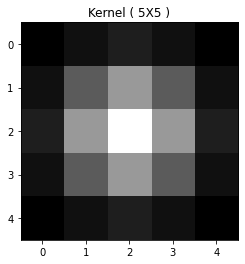

Image Shape : (5, 5)
Kernel Shape : (5, 5)


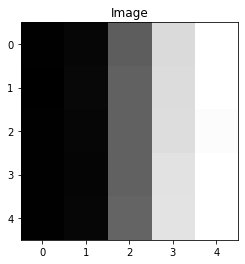

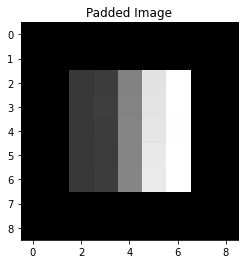

Output Image size : (5, 5)


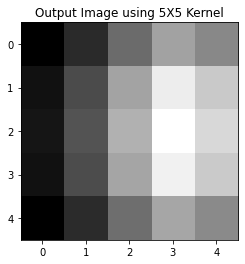

In [8]:
blurred_patch = gaussian_blur(image_patch, 5, True)

In [9]:
kernel = gaussian_kernel(5, sigma=1)

In [10]:
kernel

array([[0.01831564, 0.082085  , 0.13533528, 0.082085  , 0.01831564],
       [0.082085  , 0.36787944, 0.60653066, 0.36787944, 0.082085  ],
       [0.13533528, 0.60653066, 1.        , 0.60653066, 0.13533528],
       [0.082085  , 0.36787944, 0.60653066, 0.36787944, 0.082085  ],
       [0.01831564, 0.082085  , 0.13533528, 0.082085  , 0.01831564]])

### here we take the derivative using the sobel operator we defined the sobel operator for derivative over x and derivative over y

In [11]:
sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

In [12]:
def sobel_edge_detection(image, filter_x, filter_y, convert_to_degree=False, verbose=False):
    new_image_x = convolution(image, filter_x, verbose)

    if verbose:
        plt.imshow(new_image_x, cmap='gray')
        plt.title("Horizontal Edge")
        plt.show()

    new_image_y = convolution(image, filter_y, verbose)

    if verbose:
        plt.imshow(new_image_y, cmap='gray')
        plt.title("Vertical Edge")
        plt.show()

    gradient_magnitude = np.sqrt(np.square(new_image_x) + np.square(new_image_y))

    gradient_magnitude *= 255.0 / gradient_magnitude.max()

    if verbose:
        plt.imshow(gradient_magnitude, cmap='gray')
        plt.title("Gradient Magnitude")
        plt.show()

    gradient_direction = np.arctan2(new_image_y, new_image_x)

    if convert_to_degree:
        gradient_direction = np.rad2deg(gradient_direction)
        gradient_direction += 180

    return gradient_magnitude, gradient_direction

Image Shape : (5, 5)
Kernel Shape : (3, 3)
Output Image size : (5, 5)


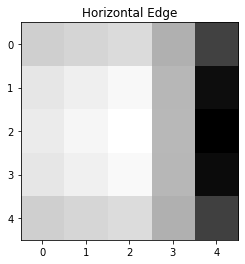

Image Shape : (5, 5)
Kernel Shape : (3, 3)
Output Image size : (5, 5)


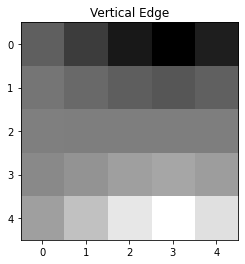

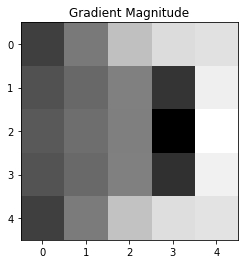

In [13]:
gradient_magnitude, gradient_direction = sobel_edge_detection(blurred_patch, sobel_x,sobel_y, verbose=True)

## Non max Supression

This is used to remove the edges that are weakly present and give edges with strong response

This is used instead of taking the second derivative along the direction of the edges detected as it is a compute heavy process and requires a lot of rotational matrices to convert the laplacian to the direction $\hat{n}$

NMS works in the following way:

- After computing our gradient magnitude representation, the edges themselves are still quite noisy and blurred, but in reality there should only be one edge response for a given region, not a whole clump of pixels reporting themselves as edges.

- To remedy this, we can apply edge thinning using non-maxima suppression. To apply non-maxima suppression we need to examine the gradient magnitude G and orientation \theta at each pixel in the image and:
1. Compare the current pixel to the 3 $\times$ 3 neighborhood surrounding it
2. Determine in which direction the orientation is pointing:
    1. If it’s pointing towards the north or south, then examine the north and south magnitude
    2. If the orientation is pointing towards the east or west, then examine the east and west pixels
3. If the center pixel magnitude is greater than both the pixels it is being compared to, then preserve the magnitude; otherwise, discard it

- Some implementations of the Canny edge detector round the value of \theta to either 0^{\circ}, 45^{\circ}, 90^{\circ}, or 135^{\circ}, and then use the rounded angle to compare not only the north, south, east, and west pixels, but also the corner top-left, top-right, bottom-right, and bottom-left pixels as well.

In [14]:
def non_max_suppression(gradient_magnitude, gradient_direction, verbose):
    image_row, image_col = gradient_magnitude.shape
 
    output = np.zeros(gradient_magnitude.shape)
 
    PI = 180
 
    for row in range(1, image_row - 1):
        for col in range(1, image_col - 1):
            direction = gradient_direction[row, col]
 
            if (0 <= direction < PI / 8) or (15 * PI / 8 <= direction <= 2 * PI):
                before_pixel = gradient_magnitude[row, col - 1]
                after_pixel = gradient_magnitude[row, col + 1]
 
            elif (PI / 8 <= direction < 3 * PI / 8) or (9 * PI / 8 <= direction < 11 * PI / 8):
                before_pixel = gradient_magnitude[row + 1, col - 1]
                after_pixel = gradient_magnitude[row - 1, col + 1]
 
            elif (3 * PI / 8 <= direction < 5 * PI / 8) or (11 * PI / 8 <= direction < 13 * PI / 8):
                before_pixel = gradient_magnitude[row - 1, col]
                after_pixel = gradient_magnitude[row + 1, col]
 
            else:
                before_pixel = gradient_magnitude[row - 1, col - 1]
                after_pixel = gradient_magnitude[row + 1, col + 1]
 
            if gradient_magnitude[row, col] >= before_pixel and gradient_magnitude[row, col] >= after_pixel:
                output[row, col] = gradient_magnitude[row, col]
 
    if verbose:
        plt.imshow(output, cmap='gray')
        plt.title("Non Max Suppression")
        plt.show()
 
    return output

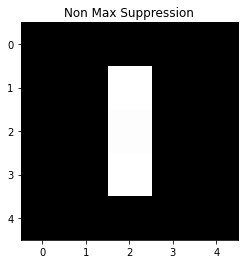

In [15]:
final_image = non_max_suppression(gradient_magnitude, gradient_direction, verbose=True)